In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import ttest_ind
from tqdm import tqdm

# set random seed
np.random.seed(42)

## Central Limit Theorem

In [2]:
n_trials = 1000
n_samples = 100

The mean of sample means is: 1.001.
The standard deviation of sample means is: 0.104.


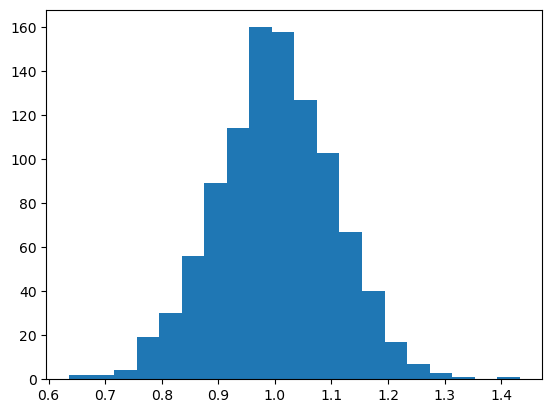

In [3]:
# normal distribution
sample_means = []
for _ in range(n_trials):
    X = np.random.normal(loc=1.0, scale=1.0, size=n_samples)
    sample_means.append(np.mean(X))

print(f"The mean of sample means is: {np.mean(sample_means):5.3f}.")
print(f"The standard deviation of sample means is: {np.std(sample_means):5.3f}.")
plt.hist(sample_means, bins=20)
plt.show()

The mean of sample means is: 0.598.
The standard deviation of sample means is: 0.050.


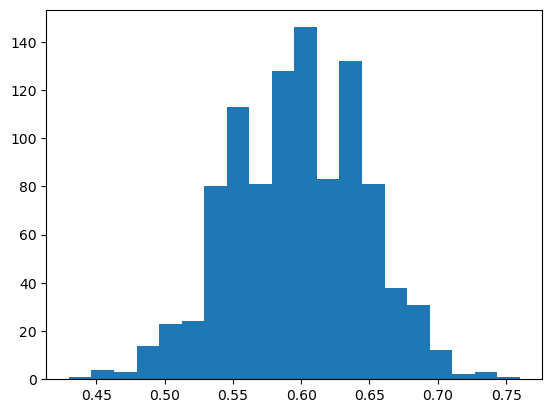

In [4]:
# bernoulli distribution
sample_means = []
p = 0.6
for _ in range(n_trials):
    X_uniform = np.random.random(size=n_samples)
    X = [1 if x < p else 0 for x in X_uniform]
    sample_means.append(np.mean(X))

print(f"The mean of sample means is: {np.mean(sample_means):5.3f}.")
print(f"The standard deviation of sample means is: {np.std(sample_means):5.3f}.")
plt.hist(sample_means, bins=20)
plt.show()

The mean of sample means is: 6.000.
The standard deviation of sample means is: 0.157.


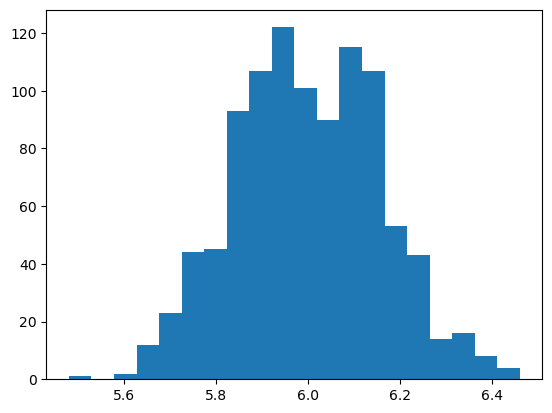

In [5]:
# binomial distribtuion
sample_means = []
for _ in range(n_trials):
    X = np.random.binomial(n=10, p=0.6, size=n_samples)
    sample_means.append(np.mean(X))

print(f"The mean of sample means is: {np.mean(sample_means):5.3f}.")
print(f"The standard deviation of sample means is: {np.std(sample_means):5.3f}.")
plt.hist(sample_means, bins=20)
plt.show()

The mean of sample means is: 1.665.
The standard deviation of sample means is: 0.107.


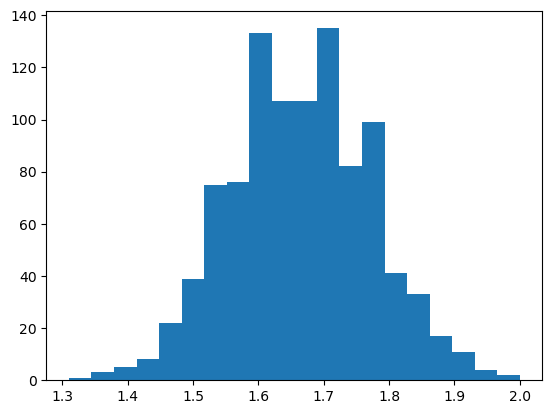

In [6]:
# geometric distribution
sample_means = []
for _ in range(n_trials):
    X = np.random.geometric(p=0.6, size=n_samples)
    sample_means.append(np.mean(X))

print(f"The mean of sample means is: {np.mean(sample_means):5.3f}.")
print(f"The standard deviation of sample means is: {np.std(sample_means):5.3f}.")
plt.hist(sample_means, bins=20)
plt.show()

## Point estimation and confidence interval

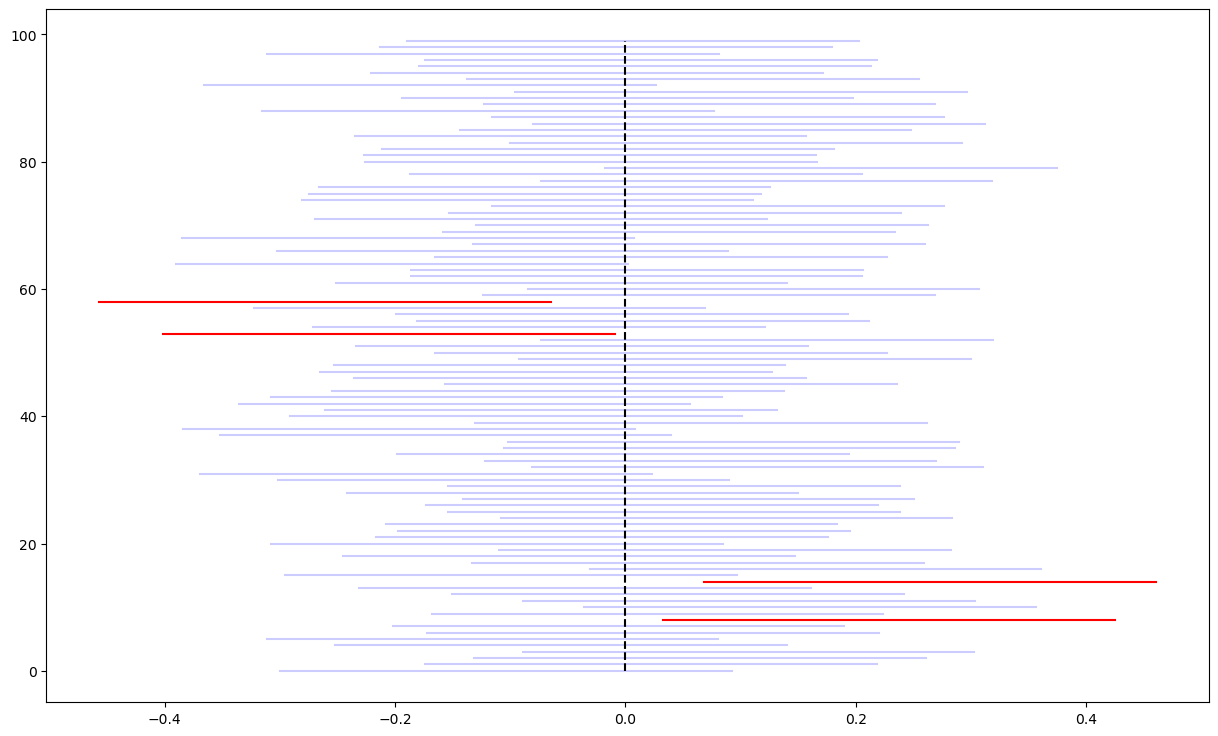

In [7]:
np.random.seed(42)

mu = 0  # population mean
sigma = 1

n_trials = 100
n_samples = 100
results = []
for i, _ in enumerate(range(n_trials)):
    X = np.random.normal(loc=mu, scale=sigma**0.5, size=n_samples)  # Sampling
    lower_bound = np.mean(X) - 1.96 * np.std(X, ddof=1) / np.sqrt(n_samples)
    upper_bound = np.mean(X) + 1.96 * np.std(X, ddof=1) / np.sqrt(n_samples)
    
    results.append((i, lower_bound, upper_bound))
    
plt.figure(figsize=(15, 9))
for i, lower, upper in results:
    if lower > mu or upper < mu:
        plt.plot([lower, upper], [i] * 2, color="red", alpha=1)
    else:
        plt.plot([lower, upper], [i] * 2, color="blue", alpha=0.2)
plt.plot([mu] * len(results), list(range(len(results))), "k--")
plt.show()